In [1]:
#Assignment Topic:
 #Task:1 Analysis the dataset using seaborn / matplotlib / scatter
 #Task:2 Do SMOTETomek sampling on given dataset and Create ML model and evaluate model by cross validation again
 #Task:3 Do Undersampling on given dataset and Create ML model and evaluate model by cross validation again
 #Task:4 Do Over sampling on given dataset and Create ML model and evaluate model by cross validation again

    #Decision Tree Classifier
    #KNN Classifier
    #LogisticRegression
    #XGBoost
    #AdaBosst

# Import Necessary Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings as w
w.filterwarnings('ignore')

In [3]:
df = pd.read_csv('new churn data.csv') # import data set 

In [4]:
df.head() 

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [5]:
df.shape 

(5282, 21)

In [6]:
df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [8]:
1390/(3892+1390)

0.2631578947368421

# Task:1

In [9]:
# Task:1 Analysis the dataset using seaborn / matplotlib / scatter

<AxesSubplot:xlabel='Churn', ylabel='count'>

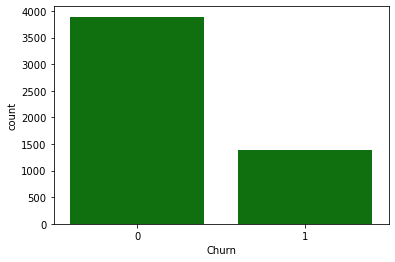

In [10]:
sns.countplot(df['Churn'],color='green')

In [11]:
df = df.dropna()

In [12]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(5282, 21)

In [14]:
df.corr()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


<AxesSubplot:>

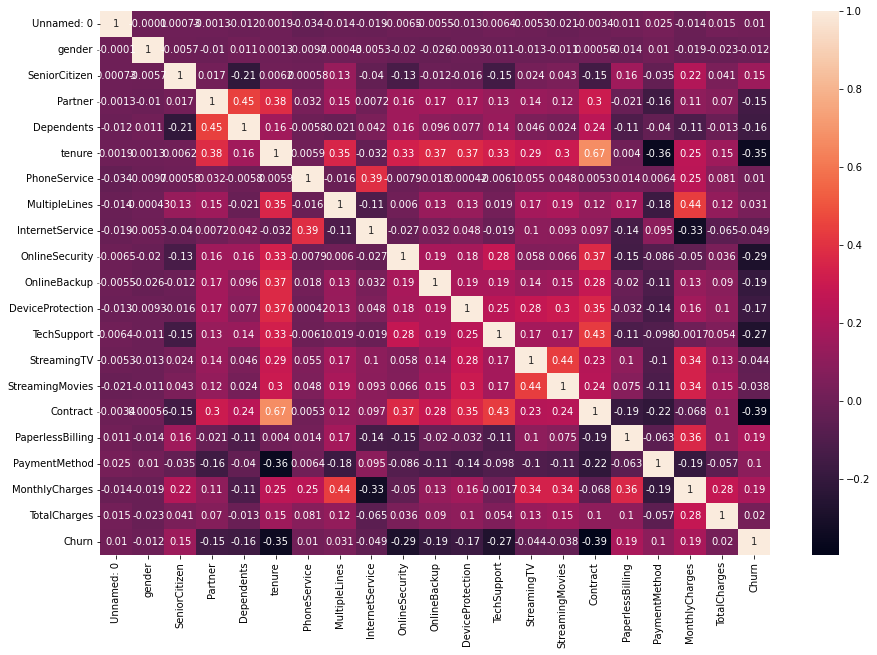

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot=True)

# Basic Visualization Using Seaborn Library

<AxesSubplot:xlabel='count', ylabel='gender'>

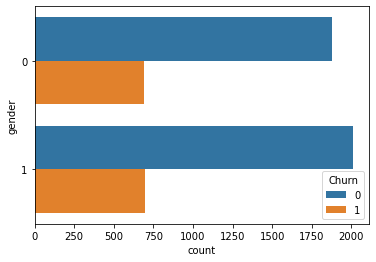

In [16]:
sns.countplot( y = 'gender', hue='Churn', data=df )

<AxesSubplot:xlabel='gender', ylabel='count'>

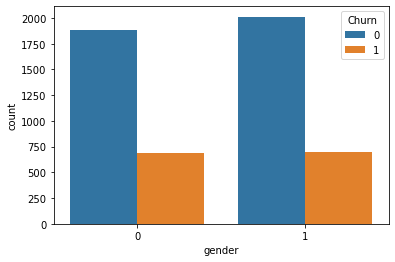

In [17]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

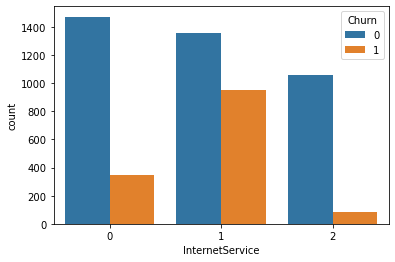

In [18]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

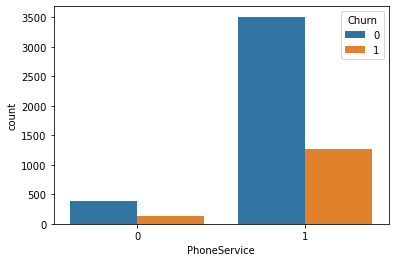

In [19]:
sns.countplot(x = 'PhoneService', hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

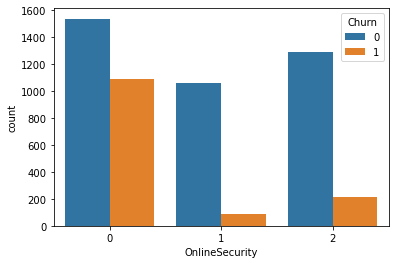

In [20]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [21]:
df['OnlineSecurity'].value_counts() 

0    2625
2    1509
1    1148
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

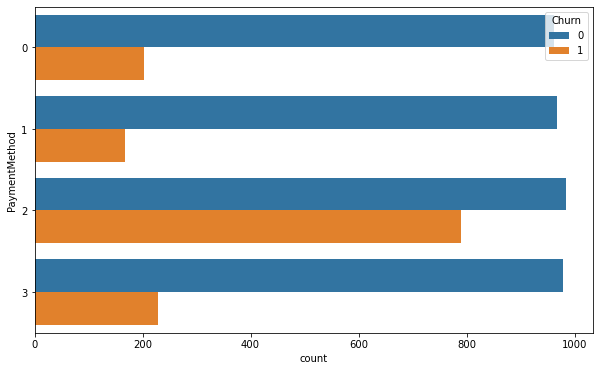

In [22]:
plt.subplots(figsize=(10,6)) 
sns.countplot(y = 'PaymentMethod', hue='Churn', data=df) 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

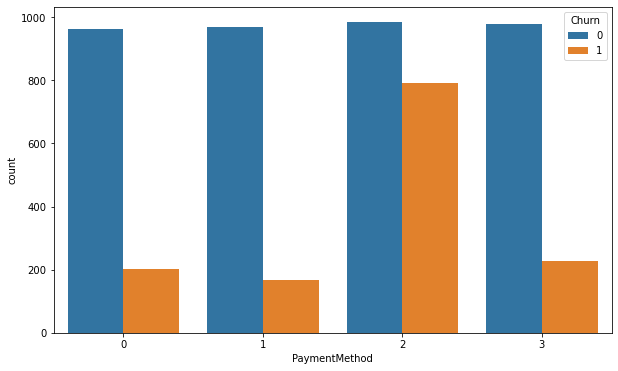

In [23]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod', hue='Churn', data=df)

# Preprocess the Dataset

In [24]:
#Drop first column
df = df.drop('Unnamed: 0', axis=1)

In [25]:
df.shape

(5282, 20)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153,1
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396,0
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211,0
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850,0
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350,1


# Encoding the Data set

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label = LabelEncoder()

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153,1
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396,0
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211,0
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850,0
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350,1


# Seperate  independent and dependent variables (x,y)

In [32]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn'] #  churn is class

In [33]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [34]:
x.shape

(5282, 19)

In [35]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Churn, dtype: int64

In [36]:
y.shape

(5282,)

# Imbalanced Data Handling

In [37]:
df.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [38]:
not_churned = (3887/(3887+1382)) * 100
churned = (1382/(3887+1382)) * 100

In [39]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 73.77111406338965 percent of total people
Churned 26.228885936610364 percent of total people


# Task: 2

In [40]:
#Task:2 Do SMOTETomek sampling on given dataset and Create ML model and evaluate model by cross validation again


    #Decision Tree Classifier
    #KNN Classifier
    #LogisticRegression
    #XGBoost
    #AdaBosst
    
   


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [41]:
!pip install imblearn

In [42]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [43]:
from imblearn.combine import SMOTETomek

In [44]:
sm = SMOTETomek(random_state=42)

In [45]:
y.value_counts() # before sampling

0    3892
1    1390
Name: Churn, dtype: int64

In [46]:
X,Y = sm.fit_resample(x,y)

In [47]:
X.shape

(7178, 19)

In [48]:
Y.shape

(7178,)

In [49]:
Y.value_counts()

1    3589
0    3589
Name: Churn, dtype: int64

In [50]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.3,2153
1,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.0,1850
2,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.1,2350
3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3,25.8,2158
4,1,0,0,0,7,0,1,0,2,0,2,0,0,0,1,0,3,35.3,2287


In [51]:
X.shape

(7178, 19)

# Evaluate all ML Model after Sampling

# Split the dataset into train and test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=.75,random_state=42) 

In [54]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6687,0,0,1,0,9,1,0,1,0,0,0,0,1,2,0,0,2,87.683647,6218
5722,1,0,1,0,16,1,2,1,0,1,1,0,0,0,0,1,0,89.181083,3198
102,1,0,0,0,19,1,0,1,0,0,0,2,0,2,1,1,1,87.700000,1232
2470,1,0,1,0,31,1,2,0,0,0,2,2,2,2,1,1,3,79.300000,2133
4386,0,0,0,0,5,1,2,0,2,0,0,0,0,0,0,1,2,53.800000,2445


In [55]:
xtrain.shape

(5383, 19)

In [56]:
xtest.shape

(1795, 19)

In [57]:
ytrain

6687    1
5722    1
102     0
2470    0
4386    0
       ..
3772    1
5191    1
5226    1
5390    1
860     0
Name: Churn, Length: 5383, dtype: int64

In [58]:
ytest

3948    0
2789    0
4988    1
6081    1
1501    0
       ..
1253    1
2925    1
6332    1
3768    0
4204    0
Name: Churn, Length: 1795, dtype: int64

# Decision Tree Classification

In [59]:
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [60]:
clf = DecisionTreeClassifier() # creating object for decision tree

In [61]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [62]:
ypred = clf.predict(xtest)
ypred 

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [63]:
accuracy_score(ytest, ypred)

0.811142061281337

In [64]:
Decision_tree_accuracy=clf.score(xtest,ytest)  # After sampling
Decision_tree_accuracy

0.811142061281337

# KNN Classification

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
KNN = KNeighborsClassifier(n_neighbors = 100)
KNN

KNeighborsClassifier(n_neighbors=100)

In [67]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=100)

In [68]:
ypred1 = KNN.predict(xtest)
ypred1

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [69]:
KNN_Accuracy=KNN.score(xtest, ytest) # After sampling
KNN_Accuracy

0.6646239554317549

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
reg = LogisticRegression()

In [72]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [73]:
reg.coef_

array([[-5.42400061e-01, -3.23928840e-01, -4.60830443e-01,
        -5.88456999e-01, -2.67072786e-02, -4.93155526e-01,
        -1.20582102e-01,  2.09858702e-01, -4.74948234e-01,
        -2.37846631e-01, -3.70526790e-02, -4.95316721e-01,
        -7.22275173e-02,  1.94083796e-01, -1.04522964e+00,
        -2.08092640e-01, -3.35396541e-02,  3.59588960e-02,
         9.34352705e-05]])

In [74]:
reg.intercept_

array([0.02290329])

In [75]:
reg.predict_proba(xtest)

array([[0.10410026, 0.89589974],
       [0.9037184 , 0.0962816 ],
       [0.23797298, 0.76202702],
       ...,
       [0.05603286, 0.94396714],
       [0.96564411, 0.03435589],
       [0.98286486, 0.01713514]])

In [76]:
reg.predict(xtest)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [77]:
ytest

3948    0
2789    0
4988    1
6081    1
1501    0
       ..
1253    1
2925    1
6332    1
3768    0
4204    0
Name: Churn, Length: 1795, dtype: int64

In [78]:
ypred2 = reg.predict(xtest)
ypred2

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [79]:
logit_accuracy = reg.score(xtest, ytest) # After sampling
logit_accuracy

0.8272980501392758

# XGBoost Classifier

In [80]:
!pip install xgboost

In [81]:
import xgboost 
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier()

In [83]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
XGB_Accuracy=xgb.score(xtest,ytest) # After sampling
XGB_Accuracy

0.8685236768802228

# Ada Boost

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
ada = AdaBoostClassifier()

In [87]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [88]:
Ada_Boost_Accuracy=ada.score(xtest,ytest)  # After Sampling
Ada_Boost_Accuracy

0.8451253481894151

# Comparing Accuracy for all model after sampling

In [89]:
# Creating DataFrame for All Accuracy
accuracy_df = pd.DataFrame([['Decision Tree Classifier', Decision_tree_accuracy],['KNN_Classifier', KNN_Accuracy], ['Logistic Regression', logit_accuracy],['XGBoost_Classification',XGB_Accuracy],['Ada_Boost Classifier',Ada_Boost_Accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [90]:
accuracy_df

,Algorithm Name,Accuracy
0,Decision Tree Classifier,0.811142
1,KNN_Classifier,0.664624
2,Logistic Regression,0.827298
3,XGBoost_Classification,0.868524
4,Ada_Boost Classifier,0.845125


In [91]:
accuracy_df.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
3,XGBoost_Classification,0.868524


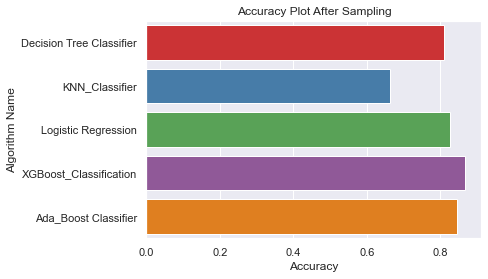

In [92]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set1").set(title='Accuracy Plot After Sampling')
sns.set(rc={'figure.figsize':(25,15)})

# Evaluate all ML Models before Sampling

# Split the dataset into train and test

In [93]:
from sklearn.model_selection import train_test_split as tts

In [94]:
x.shape

(5282, 19)

In [95]:
xtrain1, xtest1, ytrain1, ytest1 = tts(x, y, train_size=.75,random_state=42) 

In [96]:
xtrain1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
180,0,0,1,1,68,1,0,2,1,1,1,1,1,1,2,1,0,19.35,535
3567,0,0,1,1,18,1,0,2,1,1,1,1,1,1,0,1,3,20.25,3426
1672,1,1,0,0,32,1,2,1,0,0,0,0,2,2,0,1,1,96.15,2616
2589,1,1,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.10,5962
4518,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.45,3032


In [97]:
xtrain1.shape

(3961, 19)

In [98]:
xtest1.shape

(1321, 19)

In [99]:
ytrain1

180     0
3567    0
1672    1
2589    1
4518    1
       ..
3092    0
3772    0
5191    1
5226    1
860     0
Name: Churn, Length: 3961, dtype: int64

# Decision Tree Classification

In [100]:
DT_clf = DecisionTreeClassifier()

In [101]:
DT_clf.fit(xtrain1, ytrain1)

DecisionTreeClassifier()

In [102]:
DT_classifier=DT_clf.score(xtest1,ytest1) #Before Sampling
DT_classifier

0.7312641937925813

# KNN Classifier

In [103]:
KNN.fit(xtrain1,ytrain1)

KNeighborsClassifier(n_neighbors=100)

In [104]:
knn_accuracy=KNN.score(xtest1, ytest1) #Before sampling
knn_accuracy

0.7320211960635882

# Logistic_Regression

In [105]:
reg.fit(xtrain1, ytrain1)

LogisticRegression()

In [106]:
logit1 = reg.score(xtest1, ytest1) # Accuracy Before sampling
logit1

0.7804693414080243

# XGBoost Classifier

In [107]:
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [108]:
XGB1_accuracy=xgb.score(xtest1,ytest1) # Before sampling
XGB1_accuracy

0.7797123391370174

# Ada Boost Classifier

In [109]:
ada.fit(xtrain1,ytrain1)

AdaBoostClassifier()

In [110]:
AdaBoost1_accuracy=ada.score(xtest1,ytest1)  # Before Sampling
AdaBoost1_accuracy

0.7857683573050719

# Comparing Accuracy for all Model before Sampling

In [111]:
# Creating DataFrame for All Accuracy
accuracy_data = pd.DataFrame([['Decision Tree Classifier', DT_classifier],['KNN_Classifier', knn_accuracy], ['Logistic Regression', logit1],['XGBoost_Classification',XGB1_accuracy],['Ada_Boost Classifier',AdaBoost1_accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [112]:
accuracy_data

,Algorithm Name,Accuracy
0,Decision Tree Classifier,0.731264
1,KNN_Classifier,0.732021
2,Logistic Regression,0.780469
3,XGBoost_Classification,0.779712
4,Ada_Boost Classifier,0.785768


In [113]:
accuracy_data.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
4,Ada_Boost Classifier,0.785768


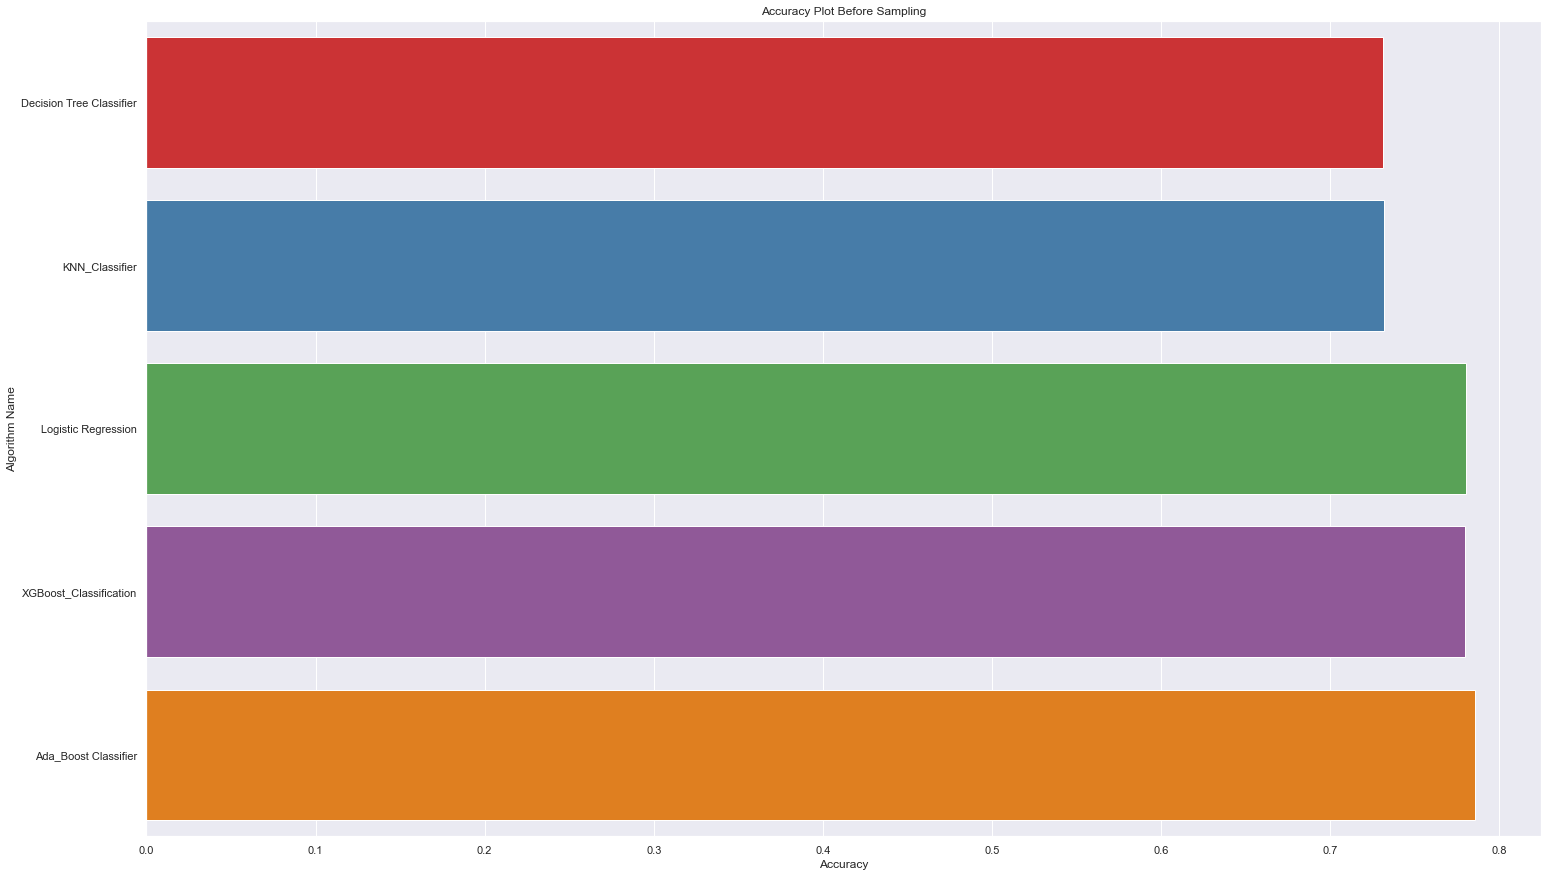

In [114]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_data, palette="Set1").set(title='Accuracy Plot Before Sampling')
sns.set(rc={'figure.figsize':(15,10)})

# Cross Validation

# Hold Out Cross Validation

In [115]:
a80 , b20 = train_test_split(df, train_size=.80, random_state=42) 

In [116]:
a80.to_csv('total 80.csv')

In [117]:
df4 = pd.read_csv('total 80.csv')
df4.shape

(4225, 21)

In [118]:
rows, col = df.shape
rows1, cols1 = df4.shape

In [119]:
rows

5282

In [120]:
rows1

4225

In [121]:
5282*.80

4225.6

In [122]:
train,  test = train_test_split(df, train_size=.75, random_state=42) 

In [123]:
train.to_csv('train_data.csv')

In [124]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3948,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.200000,5505
2789,1,0,1,1,60,1,2,1,2,0,2,0,2,0,1,1,0,95.400000,4792
4988,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,44.130448,3736
6081,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3,24.351677,2039
1501,1,0,1,0,42,1,2,0,2,0,0,0,0,0,1,0,1,56.100000,2022


In [125]:
xtrain.shape

(5383, 19)

In [126]:
xtest.shape

(1795, 19)

In [127]:
ytrain.shape

(5383,)

In [128]:
ytest.shape

(1795,)

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
Clf = DecisionTreeClassifier() 

In [131]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [132]:
Clf.score(xtest,ytest)

0.811142061281337

In [133]:
result1 = Clf.score(xtest,ytest)
result1

0.811142061281337

In [134]:
result1.mean()

0.811142061281337

# K-Fold Cross Validation

In [135]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [136]:
kfold = KFold(n_splits=4) #each fold contain 25% data

In [137]:
result = cross_val_score(xgb, X, Y, cv=kfold) 

In [138]:
result

array([0.80278552, 0.79331476, 0.8567447 , 0.92140468])

In [139]:
result.max()

0.9214046822742475

In [140]:
result.min()

0.7933147632311978

In [141]:
K_Fold_Accuracy=result.mean()
K_Fold_Accuracy

0.8435624163491428

# Stratified K-Fold Cross Validation

In [142]:
from sklearn.model_selection import StratifiedKFold

In [143]:
st = StratifiedKFold(n_splits=4)

In [144]:
score1 = cross_val_score(ada, X, Y,cv=st)

In [145]:
score1

array([0.7264624 , 0.84122563, 0.85897436, 0.86510591])

In [146]:
score1.max()

0.8651059085841695

In [147]:
score1.min()

0.7264623955431755

In [148]:
Stratified_Accuracy=score1.mean()
Stratified_Accuracy

0.8229420724606628

# Leave One Out Cross Validation

In [149]:
#from sklearn.model_selection import LeaveOneOut(It takes more time to run)

In [150]:
#le = LeaveOneOut()

In [151]:
#result = cross_val_score(ada,x,y,cv=le)

In [152]:
#result

In [153]:
#result.mean()

# Comparing Accuracy for Cross Validation Method

In [154]:
# Creating DataFrame for All Accuracy
Accuracy_df1 = pd.DataFrame([['Hold out Cross Validation', result1],['K-Fold Cross Validation', K_Fold_Accuracy], [' Stratified K-Fold Cross Validation', Stratified_Accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [155]:
Accuracy_df1

,Algorithm Name,Accuracy
0,Hold out Cross Validation,0.811142
1,K-Fold Cross Validation,0.843562
2,Stratified K-Fold Cross Validation,0.822942


In [156]:
Accuracy_df1.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
1,K-Fold Cross Validation,0.843562


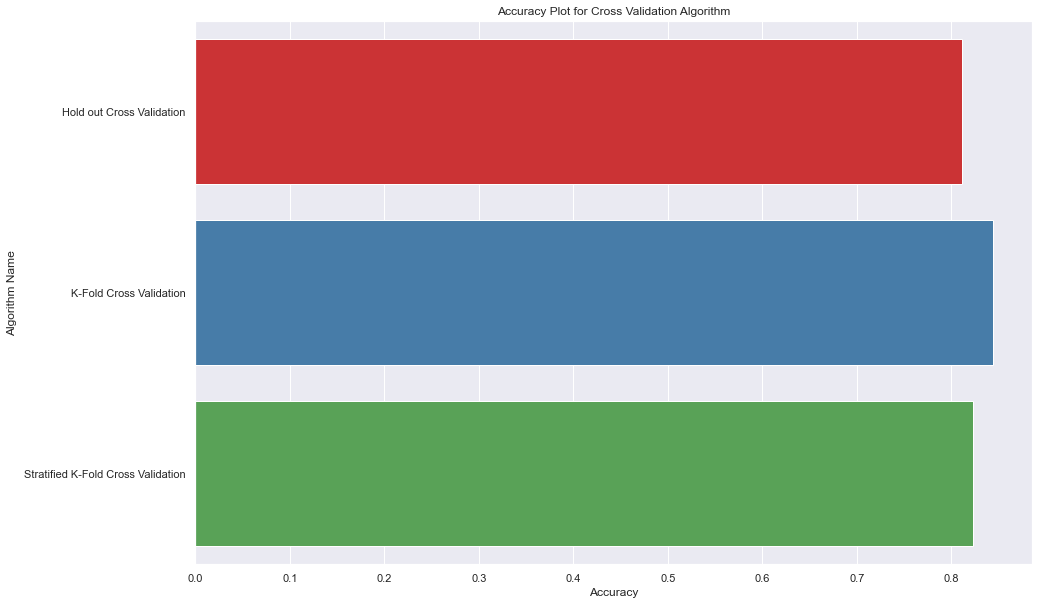

In [157]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=Accuracy_df1, palette="Set1").set(title='Accuracy Plot for Cross Validation Algorithm')
sns.set(rc={'figure.figsize':(15,10)})

# Task: 3

In [158]:
#Task:3 Do Undersampling on given dataset and Create ML model and evaluate model by cross validation again


#ML Models
1. Decision Tree
2. XGBoost
3. AdaBosst
4. KNN Classifier
5. LogisticRegression

# Near Miss for Under_Sampling

In [159]:
from imblearn.under_sampling import NearMiss

In [160]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [161]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.75,1489
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,0,1,1,0,1,1,0,1,0,2,0,0,0,0,0,1,3,76.40,5823
2776,0,0,1,1,49,1,2,1,0,2,2,2,2,2,2,1,0,107.95,4424
2777,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3,25.10,2149
2778,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,6440


In [162]:
new_x.shape

(2780, 19)

In [163]:
2780/2

1390.0

In [164]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
2775    1
2776    1
2777    1
2778    1
2779    1
Name: Churn, Length: 2780, dtype: int64

In [165]:
new_y.value_counts()

0    1390
1    1390
Name: Churn, dtype: int64

# Evaluate all ML Models after Sampling

# Split the dataset into train and test

In [166]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, train_size=.75,random_state=42) 

In [167]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
361,1,0,1,1,31,1,2,1,2,0,2,2,0,0,0,0,2,89.30,2443
2251,1,0,1,1,32,1,0,1,0,0,0,0,0,0,0,1,0,69.75,1983
1336,1,1,1,1,47,1,0,1,0,2,0,0,2,0,1,1,0,84.95,3436
2680,1,1,1,0,17,1,0,1,0,0,0,0,0,2,0,0,0,81.50,599
2159,0,0,0,0,6,1,0,1,0,0,2,2,2,2,0,1,3,99.95,4542


In [168]:
x_train.shape

(2085, 19)

In [169]:
x_test.shape

(695, 19)

In [170]:
y_train

361     0
2251    1
1336    0
2680    1
2159    1
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: Churn, Length: 2085, dtype: int64

In [171]:
y_test

1561    1
1099    0
1455    1
911     0
521     0
       ..
2539    1
1985    1
1953    1
1380    0
1927    1
Name: Churn, Length: 695, dtype: int64

# Decision Tree Classifier

In [172]:
clf1 = DecisionTreeClassifier()

In [173]:
clf1.fit(x_train, y_train)

DecisionTreeClassifier()

In [174]:
Decisiontree_accuracy=clf1.score(x_test,y_test)  # After sampling
Decisiontree_accuracy

0.6302158273381295

# KNN Classification

In [175]:
KNN1 = KNeighborsClassifier(n_neighbors = 100)
KNN1

KNeighborsClassifier(n_neighbors=100)

In [176]:
KNN1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [177]:
KNN2_Accuracy=KNN.score(x_test, y_test) # After sampling
KNN2_Accuracy

0.49640287769784175

# Logistic Regression

In [178]:
reg.fit(x_train, y_train)

LogisticRegression()

In [179]:
logit2_accuracy = reg.score(x_test, y_test) # After sampling
logit2_accuracy

0.6647482014388489

# XGBoost Classifier

In [180]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [181]:
XGB2_Accuracy=xgb.score(xtest,ytest) # After sampling
XGB2_Accuracy

0.7275766016713092

# Ada Boost Classifier

In [182]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [183]:
AdaBoost_Accuracy=ada.score(x_test,y_test)  # After Sampling
AdaBoost_Accuracy

0.6575539568345323

# Comparing Accuracy for all model after sampling

In [184]:
# Creating DataFrame for All Accuracy
accuracy_df1 = pd.DataFrame([['Decision Tree Classifier', Decisiontree_accuracy],['KNN_Classifier', KNN2_Accuracy], ['Logistic Regression', logit2_accuracy],['XGBoost_Classification',XGB2_Accuracy],['Ada_Boost Classifier',AdaBoost_Accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [185]:
accuracy_df1

,Algorithm Name,Accuracy
0,Decision Tree Classifier,0.630216
1,KNN_Classifier,0.496403
2,Logistic Regression,0.664748
3,XGBoost_Classification,0.727577
4,Ada_Boost Classifier,0.657554


In [186]:
accuracy_df1.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
3,XGBoost_Classification,0.727577


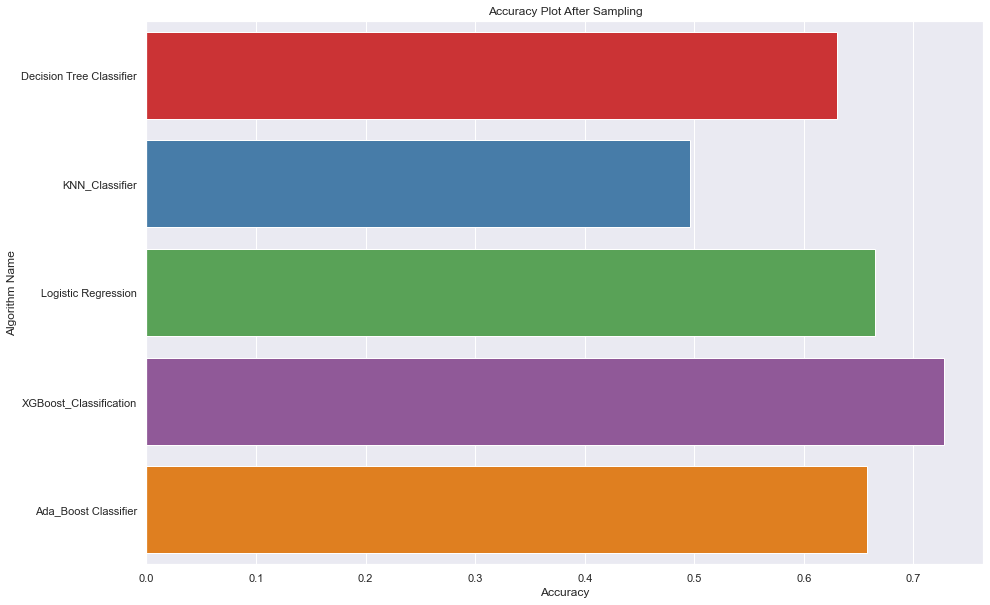

In [187]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df1, palette="Set1").set(title='Accuracy Plot After Sampling')
sns.set(rc={'figure.figsize':(15,10)})

# Evaluate all ML Models before Sampling

# Splitting the dataset into train and test

In [188]:
x_train1, x_test1, y_train1, y_test1 = tts(x, y, train_size=.75,random_state=42) 

In [189]:
x_train1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
180,0,0,1,1,68,1,0,2,1,1,1,1,1,1,2,1,0,19.35,535
3567,0,0,1,1,18,1,0,2,1,1,1,1,1,1,0,1,3,20.25,3426
1672,1,1,0,0,32,1,2,1,0,0,0,0,2,2,0,1,1,96.15,2616
2589,1,1,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.10,5962
4518,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.45,3032


In [190]:
x_train1.shape

(3961, 19)

In [191]:
x_test1.shape

(1321, 19)

In [192]:
y_train1

180     0
3567    0
1672    1
2589    1
4518    1
       ..
3092    0
3772    0
5191    1
5226    1
860     0
Name: Churn, Length: 3961, dtype: int64

In [193]:
y_test1

1448    0
4792    0
8       0
3964    0
240     0
       ..
679     0
565     1
1740    0
4009    1
680     1
Name: Churn, Length: 1321, dtype: int64

# Decision Tree Classifier

In [194]:
DT_clf1 = DecisionTreeClassifier()

In [195]:
DT_clf1.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [196]:
DT_classifier_Accuracy=DT_clf1.score(x_test1,y_test1) #Before Sampling

In [197]:
DT_classifier_Accuracy

0.7342922028766087

# KNN Classifier

In [198]:
KNN.fit(x_train1,y_train1)

KNeighborsClassifier(n_neighbors=100)

In [199]:
knn_accuracy1=KNN.score(x_test1, y_test1) #Before sampling
knn_accuracy1

0.7320211960635882

# Logistic Regression

In [200]:
reg.fit(x_train1, y_train1)

LogisticRegression()

In [201]:
logit2 = reg.score(x_test1, y_test1) # Accuracy Before sampling
logit2

0.7804693414080243

# XGBoost Classifier

In [202]:
xgb.fit(x_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [203]:
XGBoost_accuracy=xgb.score(x_test1,y_test1) # Before sampling
XGBoost_accuracy

0.7797123391370174

# Ada Boost Classifier

In [204]:
ada.fit(x_train1,y_train1)

AdaBoostClassifier()

In [205]:
AdaBoost2_accuracy=ada.score(x_test1,y_test1)  # Before Sampling
AdaBoost2_accuracy

0.7857683573050719

# Comparing Accuracy for all Model before Sampling

In [206]:
# Creating DataFrame for All Accuracy
accuracy_data1 = pd.DataFrame([['Decision Tree Classifier', DT_classifier_Accuracy],['KNN_Classifier', knn_accuracy1], ['Logistic Regression', logit2],['XGBoost_Classification',XGBoost_accuracy],['Ada_Boost Classifier',AdaBoost2_accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [207]:
accuracy_data1

,Algorithm Name,Accuracy
0,Decision Tree Classifier,0.734292
1,KNN_Classifier,0.732021
2,Logistic Regression,0.780469
3,XGBoost_Classification,0.779712
4,Ada_Boost Classifier,0.785768


In [208]:
accuracy_data1.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
4,Ada_Boost Classifier,0.785768


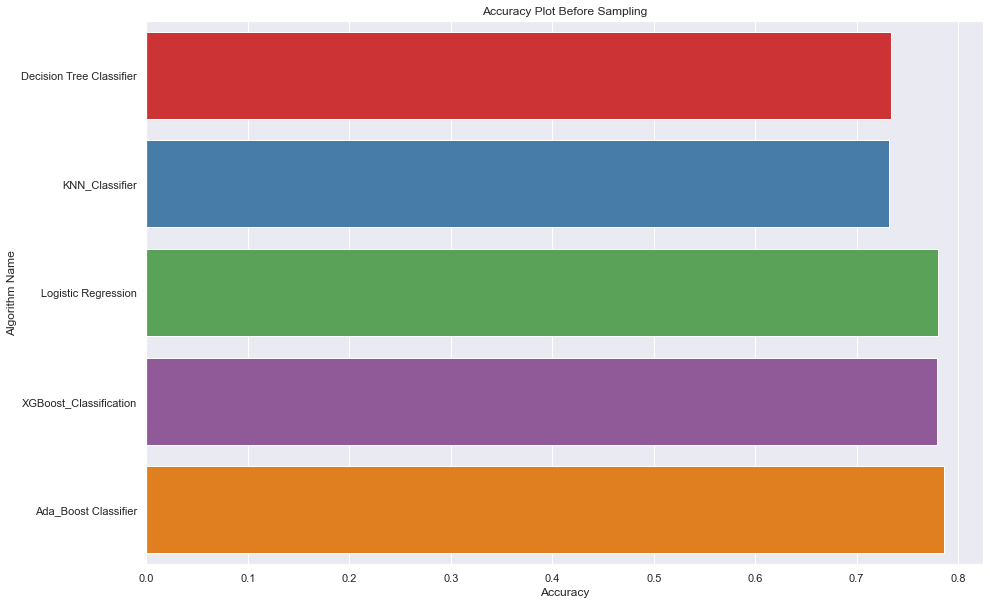

In [209]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_data1, palette="Set1").set(title='Accuracy Plot Before Sampling')
sns.set(rc={'figure.figsize':(15,10)})

# Cross Validation Algorithm

# Hold Out Cross Validation

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, train_size=.75,random_state=42)

In [213]:
DT_clf1 = DecisionTreeClassifier()

In [214]:
DT_clf1.fit(x_train, y_train)

DecisionTreeClassifier()

In [215]:
result2=DT_clf1.score(x_test,y_test)

In [216]:
result2

0.6302158273381295

In [217]:
result.mean()

0.8435624163491428

In [218]:
Hold_out_Accuracy1=result2.mean()
Hold_out_Accuracy1

0.6302158273381295

# K Fold Cross Validation

In [219]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [220]:
kfold1 = KFold(n_splits=4) #each fold contain 25% data

In [221]:
result2 = cross_val_score(xgb,new_x, new_y, cv=kfold1) 
result2

array([0.29640288, 0.36402878, 0.43884892, 0.41007194])

In [222]:
result2.max()

0.43884892086330934

In [223]:
result2.min()

0.29640287769784174

In [224]:
K_Fold_Accuracy1=result2.mean()
K_Fold_Accuracy1

0.3773381294964029

# Stratified K Fold Cross Validation

In [225]:
from sklearn.model_selection import StratifiedKFold

In [226]:
st = StratifiedKFold(n_splits=4)

In [227]:
score2 = cross_val_score(xgb, new_x, new_y,cv=st)
score2

array([0.51223022, 0.64460432, 0.64460432, 0.5942446 ])

In [228]:
score2.max()

0.6446043165467625

In [229]:
score2.min()

0.5122302158273381

In [230]:
Stratified_Accuracy1=score2.mean()
Stratified_Accuracy1

0.5989208633093526

# Comparing Accuracy for Cross Validation Method

In [231]:
# Creating DataFrame for All Accuracy
Accuracy_df2 = pd.DataFrame([['Hold out Cross Validation',Hold_out_Accuracy1],['K-Fold Cross Validation', K_Fold_Accuracy1], [' Stratified K-Fold Cross Validation', Stratified_Accuracy1]], columns=['Algorithm Name', 'Accuracy'])

In [232]:
Accuracy_df2

,Algorithm Name,Accuracy
0,Hold out Cross Validation,0.630216
1,K-Fold Cross Validation,0.377338
2,Stratified K-Fold Cross Validation,0.598921


In [233]:
Accuracy_df2.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
0,Hold out Cross Validation,0.630216


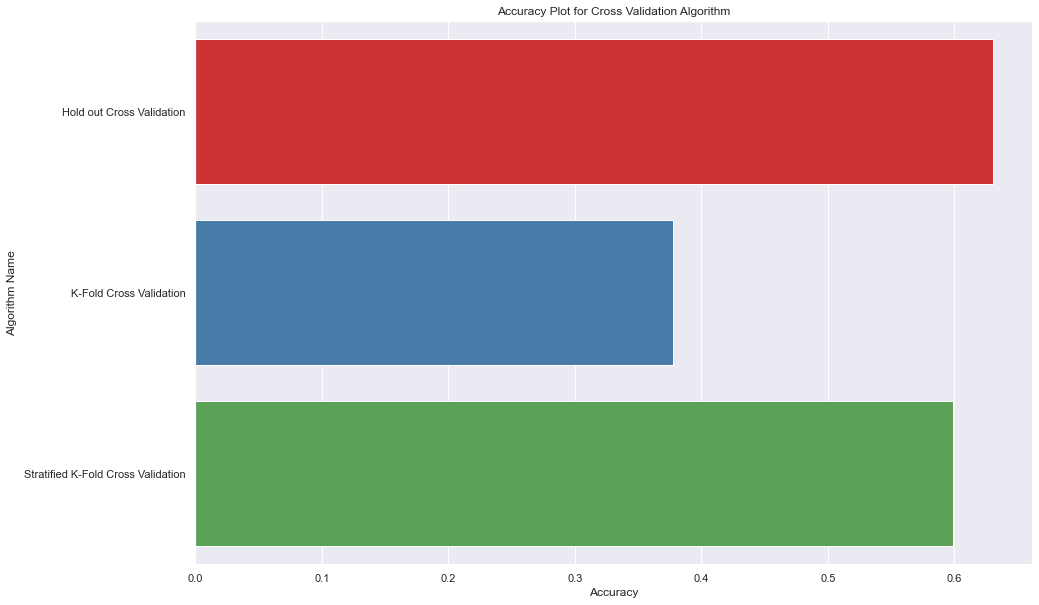

In [234]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=Accuracy_df2, palette="Set1").set(title='Accuracy Plot for Cross Validation Algorithm')
sns.set(rc={'figure.figsize':(15,10)})

# Task: 4

In [235]:
#task:4 Do Over sampling on given dataset and Create ML model and evaluate model by cross validation again


# Over Sampling

In [236]:
df1 = df.copy() 
df2 = df.copy() 
df3 = df.copy() 

In [237]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153,1
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396,0
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211,0
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850,0
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350,1


In [238]:
df1.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [239]:
from imblearn.over_sampling import RandomOverSampler

In [240]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
over = RandomOverSampler(random_state=100)

In [241]:
x_new , y_new = over.fit_resample(x,y)

In [242]:
x_new.shape

(7784, 19)

In [243]:
y_new.shape

(7784,)

In [244]:
y_new.value_counts()

1    3892
0    3892
Name: Churn, dtype: int64

In [245]:
x_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [246]:
x_new.shape

(7784, 19)

# Evaluate all ML Algorithm after Sampling

# Splitting the dataset into train and test

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
xtrain_, xtest_, ytrain_, ytest_ = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [249]:
xtrain_.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4039,0,0,1,1,14,1,2,2,1,1,1,1,1,1,0,0,3,25.55,3204
7140,1,1,1,0,11,1,0,2,1,1,1,1,1,1,0,0,3,19.95,1761
4072,0,0,0,0,60,1,2,1,0,0,2,0,0,0,1,1,0,79.20,4035
3320,0,1,0,0,4,1,2,1,2,0,0,0,0,0,0,1,2,80.25,2635
7403,0,0,0,1,2,1,2,1,0,0,0,0,2,2,0,1,0,94.20,1531


In [250]:
xtrain_.shape

(5838, 19)

In [251]:
xtest_.shape

(1946, 19)

In [252]:
ytrain_

4039    0
7140    1
4072    0
3320    0
7403    1
       ..
5226    1
5390    1
860     0
7603    1
7270    1
Name: Churn, Length: 5838, dtype: int64

In [253]:
ytest_

1405    0
1928    0
1320    1
7076    1
101     0
       ..
3357    0
1345    1
4539    0
6393    1
1183    1
Name: Churn, Length: 1946, dtype: int64

# Decision Tree Classifier

In [254]:
clf3 = DecisionTreeClassifier()

In [255]:
clf3.fit(xtrain_, ytrain_)

DecisionTreeClassifier()

In [256]:
Decision_tree_accuracy3=clf3.score(xtest_,ytest_)  # After sampling
Decision_tree_accuracy3

0.8473792394655704

# KNN Classification

In [257]:
KNN2 = KNeighborsClassifier(n_neighbors = 100)
KNN2

KNeighborsClassifier(n_neighbors=100)

In [258]:
KNN2.fit(xtrain_,ytrain_)

KNeighborsClassifier(n_neighbors=100)

In [259]:
KNN_Accuracy2=KNN2.score(xtest_, ytest_) # After sampling
KNN_Accuracy2

0.6269270298047277

# Logistic Regression

In [260]:
reg1 = LogisticRegression()

In [261]:
reg1.fit(xtrain_, ytrain_)

LogisticRegression()

In [262]:
logit_accuracy2 = reg1.score(xtest_, ytest_) # After sampling
logit_accuracy2

0.7461459403905447

# XGBoost Classifier

In [263]:
xgb = XGBClassifier()

In [264]:
xgb.fit(xtrain_,ytrain_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [265]:
XGB2_Accuracy=xgb.score(xtest_,ytest_) # After sampling
XGB2_Accuracy

0.8535457348406988

# Ada Boost Classifier

In [266]:
ada = AdaBoostClassifier()

In [267]:
ada.fit(xtrain_,ytrain_)

AdaBoostClassifier()

In [268]:
Ada_Boost_Accuracy2=ada.score(xtest_,ytest_)  # After Sampling
Ada_Boost_Accuracy2

0.7435765673175745

# Comparing Accuracy for all ML model after sampling

In [269]:
# Creating DataFrame for All Accuracy
accuracy_df3 = pd.DataFrame([['Decision Tree Classifier', Decision_tree_accuracy3],['KNN_Classifier', KNN_Accuracy2], ['Logistic Regression', logit_accuracy2],['XGBoost_Classification',XGB2_Accuracy],['Ada_Boost Classifier',Ada_Boost_Accuracy2]], columns=['Algorithm Name', 'Accuracy'])

In [270]:
accuracy_df3

,Algorithm Name,Accuracy
0,Decision Tree Classifier,0.847379
1,KNN_Classifier,0.626927
2,Logistic Regression,0.746146
3,XGBoost_Classification,0.853546
4,Ada_Boost Classifier,0.743577


In [271]:
accuracy_df3.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
3,XGBoost_Classification,0.853546


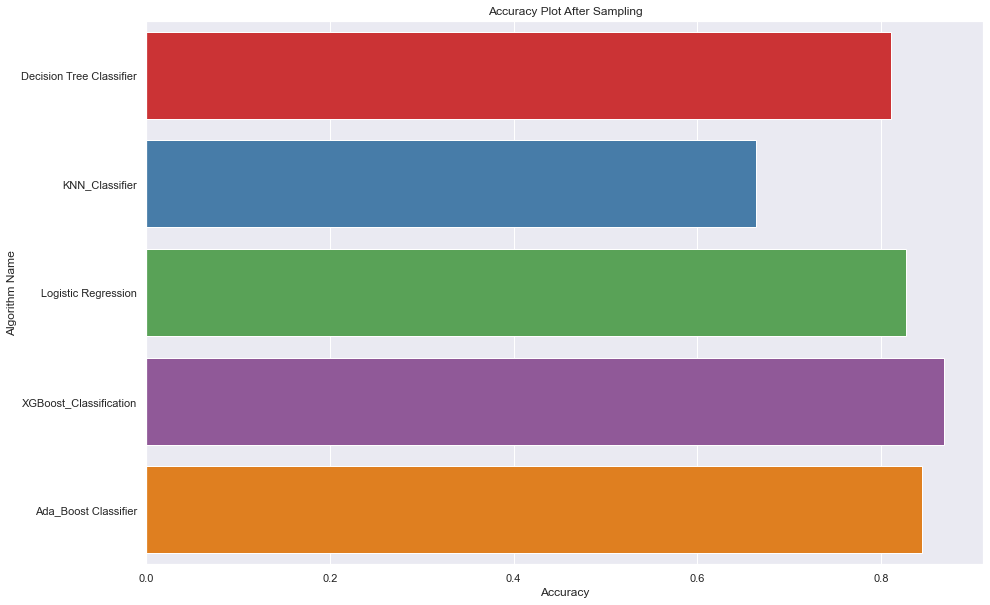

In [272]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set1").set(title='Accuracy Plot After Sampling')
sns.set(rc={'figure.figsize':(25,15)})

# Evaluate all ML Model before Sampling

# Split the dataset into train and test

In [273]:
from sklearn.model_selection import train_test_split as tts

In [274]:
x.shape

(5282, 19)

In [275]:
xtrain_1, xtest_1, ytrain_1, ytest_1 = tts(x, y, train_size=.75,random_state=42) 

In [276]:
xtrain_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
180,0,0,1,1,68,1,0,2,1,1,1,1,1,1,2,1,0,19.35,535
3567,0,0,1,1,18,1,0,2,1,1,1,1,1,1,0,1,3,20.25,3426
1672,1,1,0,0,32,1,2,1,0,0,0,0,2,2,0,1,1,96.15,2616
2589,1,1,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.10,5962
4518,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.45,3032


In [277]:
xtrain_1.shape

(3961, 19)

In [278]:
xtest_1.shape

(1321, 19)

In [279]:
ytrain_1

180     0
3567    0
1672    1
2589    1
4518    1
       ..
3092    0
3772    0
5191    1
5226    1
860     0
Name: Churn, Length: 3961, dtype: int64

In [280]:
ytest_1

1448    0
4792    0
8       0
3964    0
240     0
       ..
679     0
565     1
1740    0
4009    1
680     1
Name: Churn, Length: 1321, dtype: int64

# Decision Tree Classification

In [281]:
DT_clf.fit(xtrain_1, ytrain_1)

DecisionTreeClassifier()

In [282]:
DT_clf.fit(xtrain_1, ytrain_1)

DecisionTreeClassifier()

In [283]:
DT_classifier3=DT_clf.score(xtest_1,ytest_1) #Before Sampling
DT_classifier3

0.7305071915215746

# KNN Classifier

In [284]:
KNN.fit(xtrain_1,ytrain_1)

KNeighborsClassifier(n_neighbors=100)

In [285]:
knn_accuracy3=KNN.score(xtest_1, ytest_1) #Before sampling
knn_accuracy3

0.7320211960635882

# Logistic Regression

In [286]:
reg.fit(xtrain_1, ytrain_1)

LogisticRegression()

In [287]:
logit3 = reg.score(xtest_1, ytest_1) # Accuracy Before sampling
logit3

0.7804693414080243

# XGBoost Classifier

In [288]:
xgb.fit(xtrain_1,ytrain_1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [289]:
XGB3_accuracy=xgb.score(xtest_1,ytest_1) # Before sampling
XGB3_accuracy

0.7797123391370174

# Ada Boost Classifier

In [290]:
ada.fit(xtrain_1,ytrain_1)

AdaBoostClassifier()

In [291]:
AdaBoost3_accuracy=ada.score(xtest_1,ytest_1)  # Before Sampling
AdaBoost3_accuracy

0.7857683573050719

# Comparing Accuracy for all Model before Sampling

In [292]:
# Creating DataFrame for All Accuracy
accuracy_data3 = pd.DataFrame([['Decision Tree Classifier', DT_classifier3],['KNN_Classifier', knn_accuracy3], ['Logistic Regression', logit3],['XGBoost_Classification',XGB3_accuracy],['Ada_Boost Classifier',AdaBoost3_accuracy]], columns=['Algorithm Name', 'Accuracy'])

In [293]:
accuracy_data3

,Algorithm Name,Accuracy
0,Decision Tree Classifier,0.730507
1,KNN_Classifier,0.732021
2,Logistic Regression,0.780469
3,XGBoost_Classification,0.779712
4,Ada_Boost Classifier,0.785768


In [294]:
accuracy_data3.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
4,Ada_Boost Classifier,0.785768


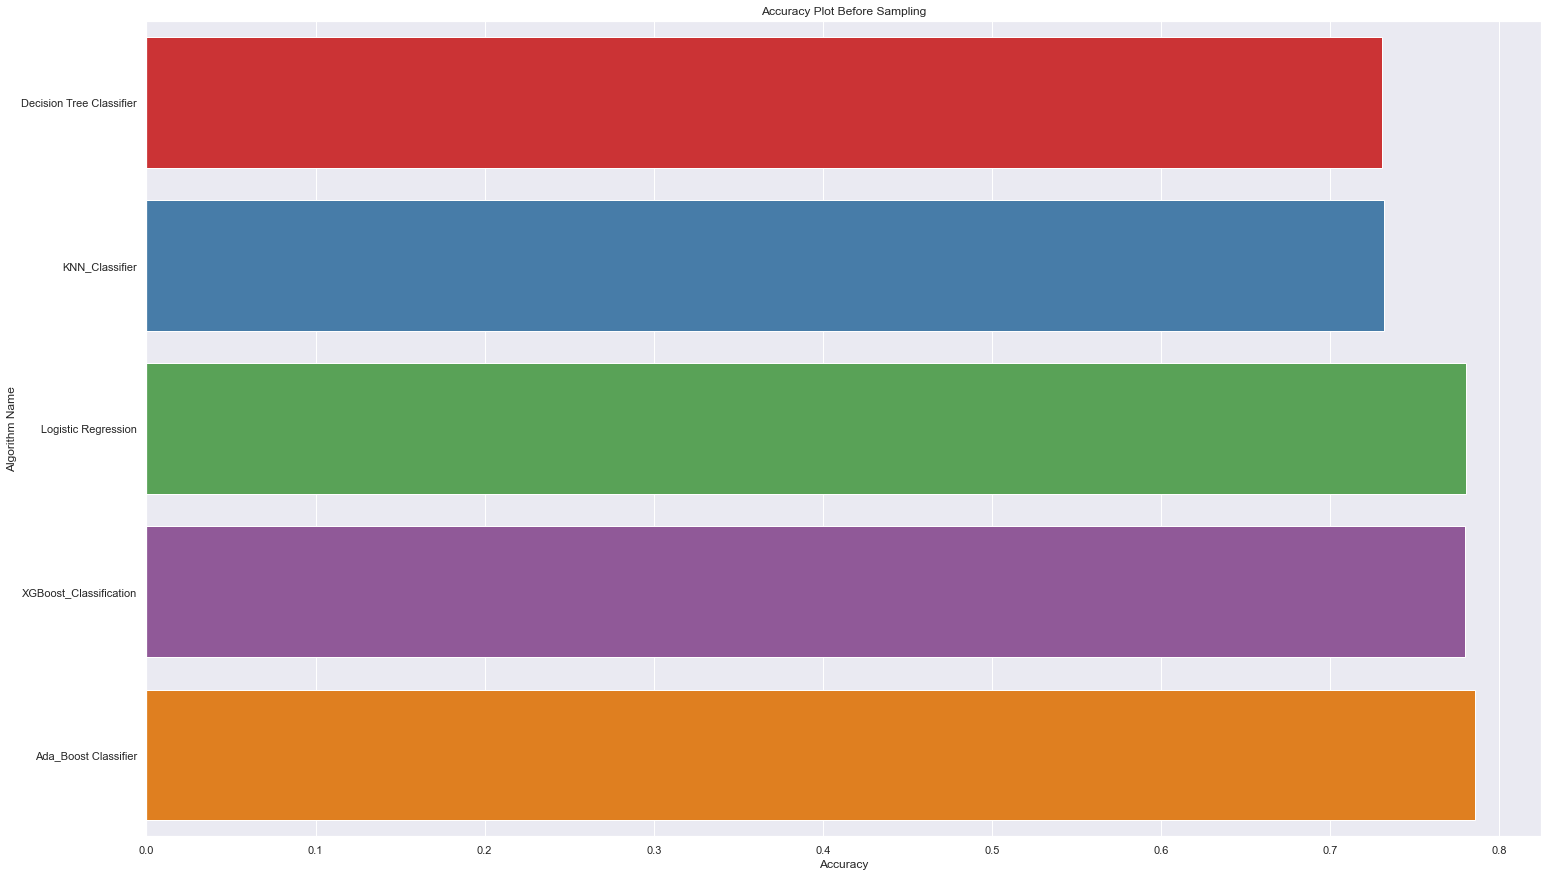

In [295]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_data3, palette="Set1").set(title='Accuracy Plot Before Sampling')
sns.set(rc={'figure.figsize':(15,10)})

# Cross Validation

# Hold Out Cross Validation

In [296]:
c80 , d20 = train_test_split(df1, train_size=.80, random_state=42) 

In [297]:
c80.to_csv('total 80.csv')

In [298]:
df5 = pd.read_csv('total 80.csv')
df5.shape

(4225, 21)

In [299]:
rows, col = df1.shape
rows3, cols3 = df5.shape

In [300]:
rows

5282

In [301]:
rows3

4225

In [302]:
5282*.80

4225.6

In [303]:
train,  test = train_test_split(df1, train_size=.75, random_state=42)

In [304]:
train.to_csv('train_data.csv')

In [305]:
xtest_.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1405,1,0,1,1,28,0,1,0,0,2,2,2,2,2,1,1,1,60.00,1176
1928,1,0,1,1,1,1,0,1,0,0,0,0,2,2,0,1,2,90.10,6322
1320,1,0,1,1,9,1,2,1,0,0,2,0,0,0,0,1,0,79.35,5273
7076,1,0,0,0,54,1,0,1,2,2,0,2,2,2,1,1,1,105.40,4672
101,0,0,1,0,2,1,0,0,2,0,0,0,0,2,0,1,3,62.15,248


In [306]:
xtrain_.shape

(5838, 19)

In [307]:
xtest_.shape

(1946, 19)

In [308]:
ytest_.shape

(1946,)

In [309]:
DT_clf2 = DecisionTreeClassifier()

In [310]:
DT_clf2.fit(xtrain_,ytrain_)

DecisionTreeClassifier()

In [311]:
result3=DT_clf2.score(xtest_,ytest_)
result3

0.8550873586844809

In [312]:
result3.mean()

0.8550873586844809

In [313]:
Hold_out_Accuracy3=result3.mean()
Hold_out_Accuracy3

0.8550873586844809

# K Fold Cross Validation

In [314]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [315]:
kfold3 = KFold(n_splits=4) #each fold contain 25% data

In [316]:
result3 = cross_val_score(xgb, x_new, y_new, cv=kfold3) 

In [317]:
result3.max()

0.9167523124357657

In [318]:
result3.min()

0.8042137718396711

In [319]:
K_Fold_Accuracy3=result3.mean()
K_Fold_Accuracy3

0.8486639260020556

# Stratified K Fold Cross Validation

In [320]:
from sklearn.model_selection import StratifiedKFold

In [321]:
st = StratifiedKFold(n_splits=4)

In [322]:
score3 = cross_val_score(xgb, x_new, y_new,cv=st)
score3

array([0.84069887, 0.86485098, 0.87564234, 0.89054471])

In [323]:
score3.max()

0.8905447070914697

In [324]:
score3.min()

0.8406988694758479

In [325]:
Stratified_Accuracy3=score3.mean()
Stratified_Accuracy3

0.867934224049332

# Comparing Accuracy for Cross Validation Method

In [326]:
# Creating DataFrame for All Accuracy
Accuracy_df3 = pd.DataFrame([['Hold out Cross Validation', Hold_out_Accuracy3],['K-Fold Cross Validation', K_Fold_Accuracy3], [' Stratified K-Fold Cross Validation', Stratified_Accuracy3]], columns=['Algorithm Name', 'Accuracy'])

In [327]:
Accuracy_df3

,Algorithm Name,Accuracy
0,Hold out Cross Validation,0.855087
1,K-Fold Cross Validation,0.848664
2,Stratified K-Fold Cross Validation,0.867934


In [328]:
Accuracy_df3.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
2,Stratified K-Fold Cross Validation,0.867934


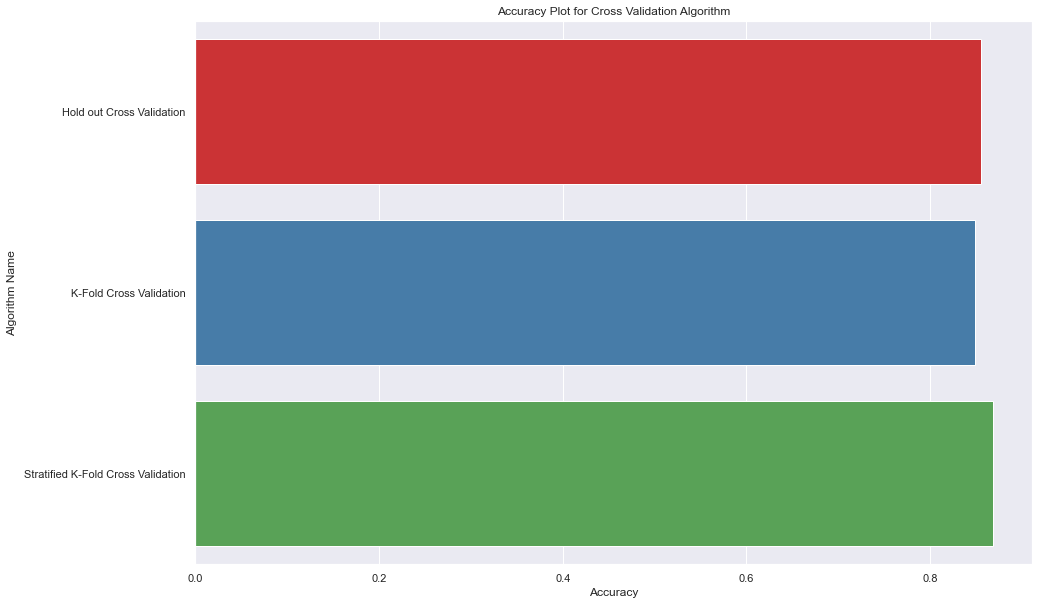

In [329]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=Accuracy_df3, palette="Set1").set(title='Accuracy Plot for Cross Validation Algorithm')
sns.set(rc={'figure.figsize':(15,10)})

In [330]:
#                             ----------------------THE END--------------------